# Introducci√≥n a regresi√≥n lineal 
En esta notebook aprenderemos qu√© es una regresi√≥n lineal y c√≥mo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qu√© contienen.

## Importando librerias

In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler# escalamiento a los datos para que los valores se ajusten a ello
from sklearn.linear_model import LinearRegression # modelo de regresi√≥n lineal


In [53]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize']=(11,9.4)

## Importando datos

In [54]:
df=pd.read_csv("../data/raw/housing.csv", header=None, sep="\s+") # header no existe, y ademas tiene una seperacion por espacios \s+ (separacion por espacios)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [55]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## Entendiendo los datos

1. CRIM: tasa de delincuencia per c√°pita por ciudad

2. ZN: proporci√≥n de terrenos residenciales zonificados para lotes de m√°s de 25.000 pies cuadrados

3. INDUS: proporci√≥n de acres de negocios no minoristas por ciudad

4. CHAS: variable ficticia del r√≠o Charles (= 1 si la parcela limita con el r√≠o; 0 en caso contrario)

5. NOX: concentraci√≥n de √≥xidos n√≠tricos (partes por cada 10 millones)

6. RM: n√∫mero promedio de habitaciones por vivienda

7. AGE: proporci√≥n de unidades ocupadas por sus propietarios construidas antes de 1940

8. DIS: distancias ponderadas a cinco centros de empleo de Boston

9. RAD: √≠ndice de accesibilidad a carreteras radiales

10. TAX: tasa de impuesto sobre la propiedad de valor total por cada $10,000

11. PTRATIO: relaci√≥n alumno-maestro por ciudad

12. B: 1000(Bk - 0.63)^2 donde Bk es la proporci√≥n de negros por ciudad

13. LSTAT: % de estatus social bajo de la poblaci√≥n

14. MEDV: valor mediano de las viviendas ocupadas por sus propietarios en miles de d√≥lares ($1000)



Una vez descargados los datos hay que entenderlos. Es importante saber que el algoritmo de regresi√≥n lineal se basa altamente en correlaciones por lo que recomiendo que empecemos viendo un gr√°fico de correlaciones usando **[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)** de ***Seaborn***.

* DIS: distancias ponderadas a cinco centros de empleo de Boston
* INDUS: proporci√≥n de acres de negocios no minoristas por ciudad
* CRIM: tasa de delincuencia per c√°pita por ciudad
* RM: n√∫mero promedio de habitaciones por vivienda
* MEDV: valor mediano de las viviendas ocupadas por sus propietarios en miles de d√≥lares ($1000)

### An√°lisis de datos para tu primera regresi√≥n lineal


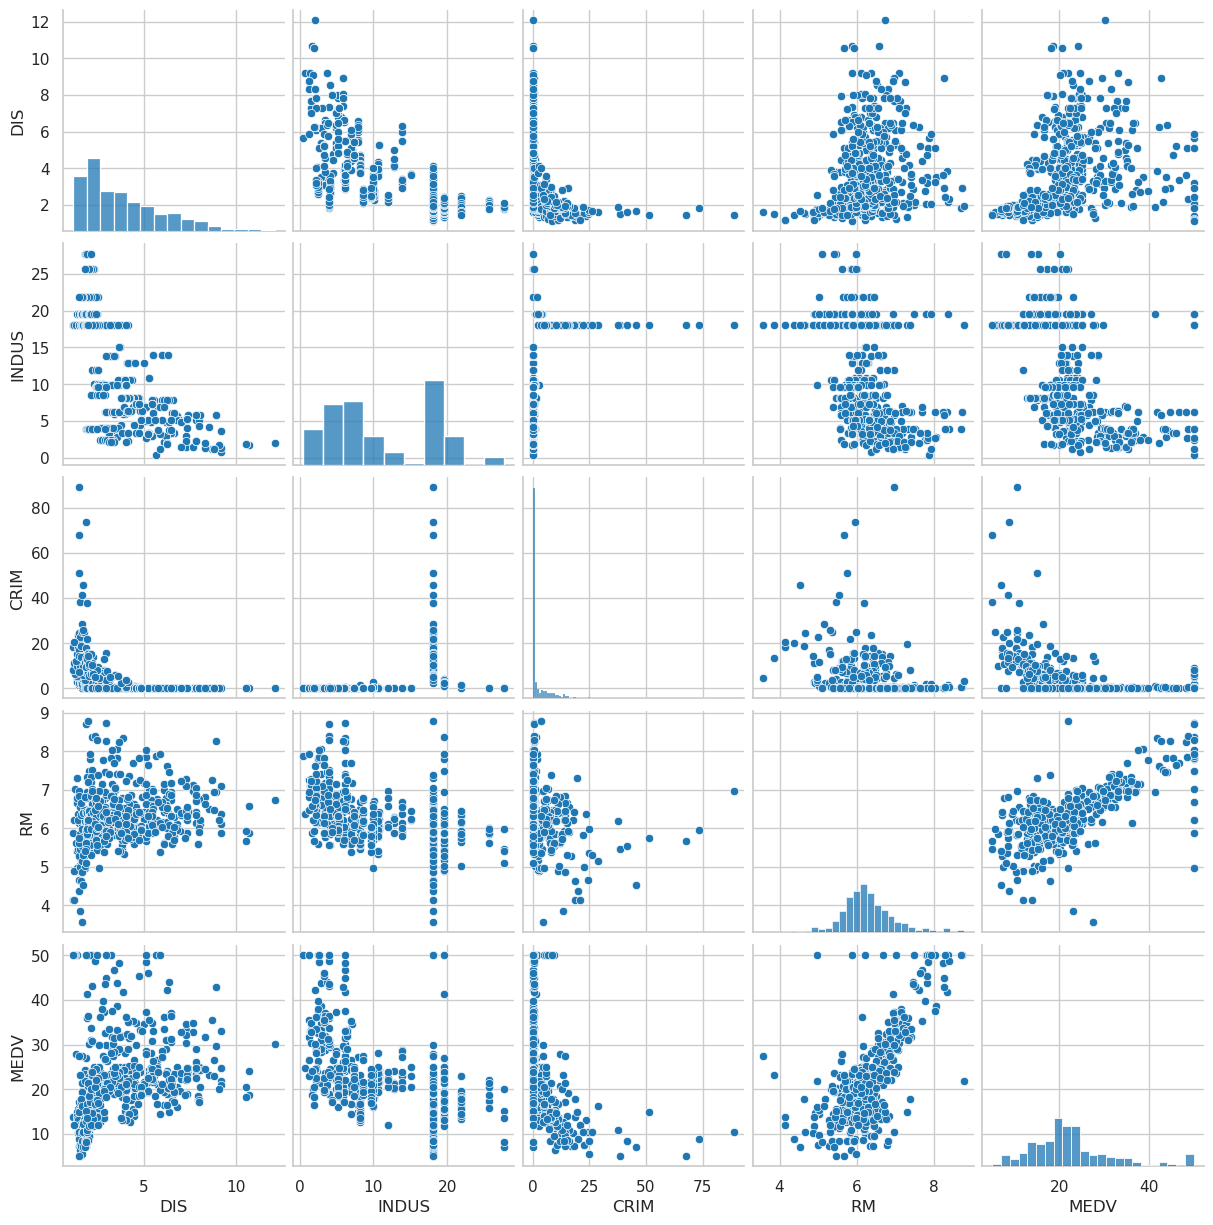

In [56]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

cols = ['DIS','INDUS','CRIM', 'RM', 'MEDV'] # columnas a graficar
sns.pairplot(df[cols], height=2.5 ) 
plt.show()

### Insight

Al observar la distribuci√≥n de la variable **MEDV**, podemos ver que se asemeja a una **distribuci√≥n normal** con algunos valores at√≠picos. Esto es importante porque **MEDV es la variable objetivo que se desea predecir**. Si la variable objetivo sigue una distribuci√≥n normal, es m√°s f√°cil y preciso construir un modelo que pueda predecir su valor.

Adem√°s, la variable **RM** tambi√©n muestra un similitud a una distribuci√≥n normal. En este caso, se puede observar una **tendencia lineal positiva entre RM y MEDV**, lo que sugiere que a medida que aumenta el valor de RM, tambi√©n aumenta el valor de MEDV. Por lo tanto, se podr√≠a utilizar esta relaci√≥n para construir un modelo de regresi√≥n lineal que prediga el valor de MEDV en funci√≥n de RM.

### An√°lisis num√©rico

Al realizar un **an√°lisis visual** de un conjunto de datos, **se obtienen ideas generales de las relaciones entre las variables y patrones**. Sin embargo,**es importante complementarlo con un an√°lisis num√©rico para confirmar que nuestras suposiciones** para confirmar si son correctas.

**El an√°lisis num√©rico** puede incluir el c√°lculo de medidas estad√≠sticas como la **media, la mediana y la desviaci√≥n est√°ndar**, as√≠ como la realizaci√≥n de **pruebas de hip√≥tesis** y la evaluaci√≥n de **correlaciones entre variables**.

En este caso, **se observa una relaci√≥n aparentemente lineal**, por lo cual **es necesario calcular la correlaci√≥n num√©rica para determinar si es significativa y cu√°nto es su fuerza**. Asimismo, **en cuanto a los valores at√≠picos**, es necesario analizar num√©ricamente su **impacto en las medidas estad√≠sticas** y determinar si deben ser excluidos o si representan informaci√≥n importante.

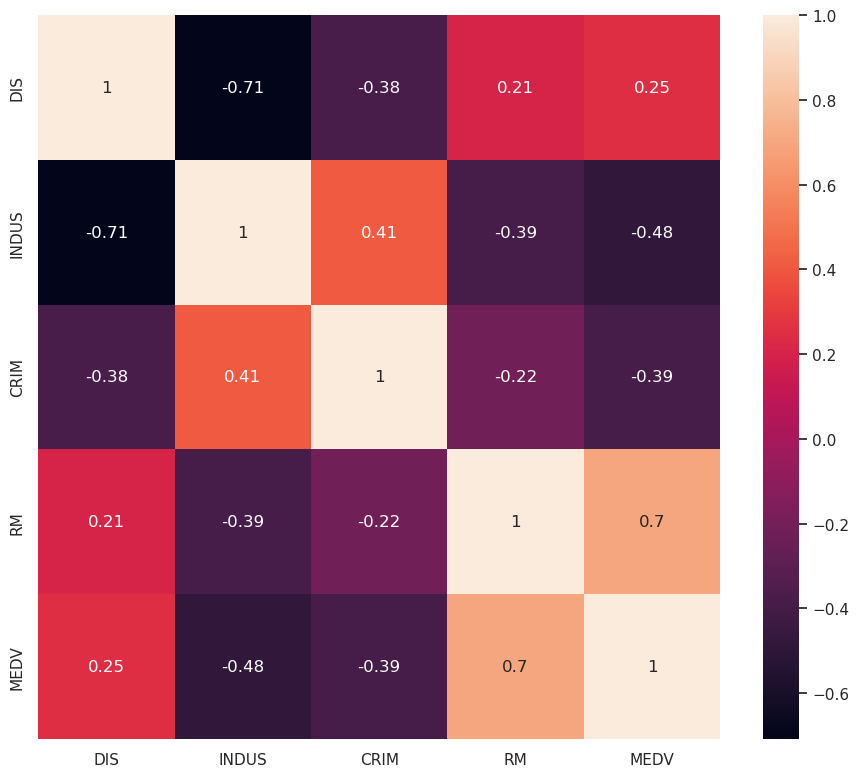

In [57]:
(
    sns.heatmap(
        data=df[cols].corr(numeric_only=True),
        cbar=True,
        annot=True,
        yticklabels=cols,
        xticklabels=cols
    )
);

### Insight 

* En particular, se observ√≥ que la correlaci√≥n entre las variables RM(n√∫mero promedio de habitaciones por vivienda) y MEDV(valor mediano de las viviendas ocupadas por sus propietarios en miles de d√≥lares ($1000)) es positiva y relativamente alta en comparaci√≥n con las dem√°s variables. **Esto significa que a medida que aumenta el n√∫mero promedio de habitaciones por vivienda (RM), tambi√©n tiende a aumentar el valor mediano de las viviendas ocupadas por sus propietarios (MEDV)**.

* La correlaci√≥n entre INDUS(proporci√≥n de acres de negocios no minoristas por ciudad) y DIS(distancias ponderadas a cinco centros de empleo de Boston) es negativa, es decir, esto podr√≠a indicar **que a medida que una ciudad tiene una mayor cantidad de negocios no minoristas, es m√°s probable que se encuentre cerca de los centros de empleo de Boston.**

* La correlaci√≥n entre valor mediano de las viviendas ocupadas por sus propietarios (MEDV) y la proporci√≥n de acres de negocios no minoristas por ciudad (INDUS) es de -0.483. Esta correlaci√≥n negativa **sugiere que a medida que aumenta la proporci√≥n de acres de negocios no minoristas por ciudad (INDUS), el valor mediano de viviendas ocupadas por el propietario (MEDV) tiende a disminuir.**

## Creando modelo con scikit-learn

### Entrenando un modelo de regresi√≥n lineal con scikit-learn
### ¬øQu√© es un modelo de regresion lineal?

**Un modelo de regresi√≥n lineal se utiliza para encontrar la l√≠nea recta que mejor se ajusta a los datos y que se puede utilizar para hacer predicciones sobre nuevos datos.** La f√≥rmula incluye t√©rminos de intercepci√≥n y coeficiente de regresi√≥n, y el objetivo del modelo es minimizar la suma de los cuadrados de los errores para obtener la mejor l√≠nea recta.

Ahora realizaremos un modelo de *regresi√≥n lineal simple para predecir el precio de una casa* (variable dependiente) *en funci√≥n del promedio de habitaciones* (variable independiente).

La idea del siguiente ejercicio es ver como se utiliza un modelo de regresi√≥n lineal simple para predecir la mediana del precio de las casas en Boston a partir del n√∫mero promedio de habitaciones.

1. Guardamos los datos de inter√©s en una variable x e y

In [59]:
x= df['RM'].values.reshape(-1,1) # variable independiente
y= df['MEDV'].values.reshape(-1,1) # variable dependiente

2. Instanciamos el modelo de escalamiento con standardscaler de skelarn para minimizar los errores

In [60]:
sc_x = StandardScaler()
sc_y = StandardScaler()

3. Estandarizamos los datos z=(x-u)/std

In [61]:
x_standar=sc_x.fit_transform(x)
y_standar=sc_y.fit_transform(y)

4. Instanciamos y ajustamos el modelo de regresi√≥n lineal con sklearn

In [63]:
slr = LinearRegression() 
slr.fit(x_standar, y_standar) # crear la linea recta que mejor se ajuste a los datos


LinearRegression()

5. Graficamos los datos estandarizados

Text(0.5, 0, 'Promedio de habitaciones [RM]')

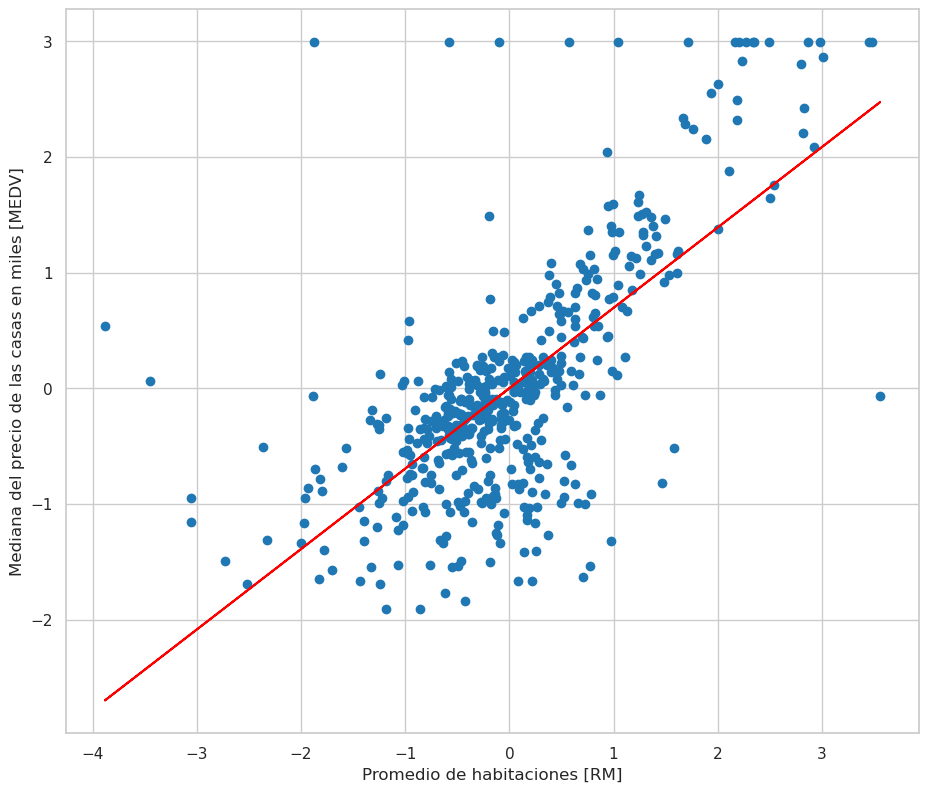

In [64]:
plt.scatter(x_standar,y_standar) # graficar los datos dos variables

plt.plot(x_standar,slr.predict(x_standar), color='r' ) # graficar la linea de regresion, luego usamos slr.predict para predecir los valores de x

plt.ylabel("Mediana del precio de las casas en miles [MEDV]"  )
plt.xlabel("Promedio de habitaciones [RM]")

6. Generando predicci√≥n con el modelo

In [71]:
# ¬øcuanto cuesta una casa con 5 habitaciones?
num_habitaciones = 5

# estandarizamos el numero de habitaciones, con el metodo transform de la libreria de sklearn, ya que recive un arreglo de numpy, se le tiene que decir np.array pasamos el # de habitaciones como lista y al final reshape para que sea un arreglo de numpy
num_habitaciones_standard = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))

result=sc_y.inverse_transform(slr.predict(num_habitaciones_standard))

print(f"El precio de una casa con {num_habitaciones} habitaciones es de {result*1000}")

# creamos nuestra prediccion con slr.predic del # de habitaciones estandarizado.

El precio de una casa con 5 habitaciones es de [[10839.92412946]]


# C√≥mo funciona la regresi√≥n lineal

## ¬øQu√© es la regresi√≥n lineal?
La regresi√≥n lineal es un **algoritmo de aprendizaje supervisado** utilizado para modelar la relaci√≥n entre una variable dependiente (ùëå) y una o m√°s variables independientes (ùëã).**El objetivo del modelo es encontrar la l√≠nea recta que mejor se ajusta a los datos** y utilizarla para hacer predicciones sobre nuevos datos.

### Seleccionar el modelo adecuado
**El modelo de regresi√≥n lineal simple** es el m√°s sencillo y **se utiliza cuando solo se tiene una variable independiente (X)**.Cuando se tienen m√°s de una variable independiente, se utiliza el modelo de **regresi√≥n lineal m√∫ltiple**.

### Definir la hip√≥tesis:
**La hip√≥tesis del modelo de regresi√≥n lineal es que existe una relaci√≥n lineal entre la variable dependiente y la variable independiente**, si existe una relaci√≥n lineal entre las variables, **se espera que los puntos se agrupen alrededor de una l√≠nea recta.** Esta relaci√≥n se puede expresar mediante la siguiente ecuaci√≥n:

$$ ùë¶ =ùë§0+ùë§1ùë•+ùúÄ $$

donde:

* ùë¶: es la variable dependiente o variable a predecir.
* ùë•: es la variable independiente o variable explicativa.
* ùë§0: es el t√©rmino de intercepci√≥n, que representa el valor de y cuando x es igual a cero.
* ùë§1: es el coeficiente de regresi√≥n, que representa la pendiente de la l√≠nea recta.
* ùëí: es el t√©rmino de error, que representa la diferencia entre el valor observado y el valor predicho.

En el contexto del inteligencia artificial, **ùë§0 y ùë§1 conocidos como w0 y w1 corresponden a los pesos del modelo**, los pesos **son valores que se utilizan para determinar la importancia relativa de cada variable de entrada en la predicci√≥n de la variable de salida**.

### Cu√°ndo utilizar un modelo de regresi√≥n lineal

### Preguntas clave para determinar si la regresi√≥n lineal es adecuada

**¬øTengo una variable dependiente num√©rica que quiero predecir a partir de una variable independiente num√©rica?**

Si la variable dependiente (ùëå) que queremos predecir es num√©rica y la variable independiente (ùëã) que usamos para hacer la predicci√≥n tambi√©n es num√©rica, entonces un modelo de regresi√≥n lineal podr√≠a ser una buena opci√≥n para resolver el problema.

**¬øCuento con una gran cantidad de variables y / o variables categ√≥ricas con muchos niveles?**

Si hay variables categ√≥ricas con muchos niveles, es posible que la regresi√≥n lineal no sea el modelo m√°s adecuado para el an√°lisis, ya que puede haber dificultades en la interpretaci√≥n de los resultados. En este caso, podr√≠a ser m√°s apropiado utilizar modelos de regresi√≥n log√≠stica o modelos de √°rbol de decisi√≥n para variables categ√≥ricas con muchos niveles.

### Recomendaciones para determinar si la regresi√≥n lineal
1 **Probar otros modelos**

La regresi√≥n lineal puede no ser el mejor modelo para todas las situaciones, por lo que siempre es recomendable explorar otros modelos, como la regresi√≥n log√≠stica, el √°rbol de decisi√≥n o el Random Forest, entre otros.

2 **Reducir las variables**

Si tienes muchas variables independientes, es posible que tu modelo sufra de **overfitting** o que algunas variables no sean relevantes para predecir la variable dependiente. En ese caso, se recomienda realizar **un an√°lisis de correlaci√≥n y eliminar aquellas variables con baja correlaci√≥n con la variable dependiente**.

3 **Multicolinealidad**

La multicolinealidad ocurre cuando hay una alta correlaci√≥n entre dos o m√°s variables independientes, por ejemplo tener la variable de peso en kg y peso en lbs provocaria una multicolinealidad. Esto puede afectar negativamente el modelo de regresi√≥n lineal, por lo que se recomienda identificar y eliminar las variables redundantes.

4. **No predecir fuera del dominio de la variable independiente**

Es importante tener en cuenta el dominio de la variable independiente al realizar predicciones. Si se intenta predecir fuera de este rango, los resultados pueden ser poco confiables o incluso absurdos. Es importante conocer bien los l√≠mites de la variable independiente antes de realizar predicciones con regresi√≥n lineal.

### Funci√≥n de p√©rdida y optimizaci√≥n: m√≠nimos cuadrados
 
[El MSE (Mean Squared Error), o Error Cuadr√°tico Medio](https://www.youtube.com/watch?v=k964_uNn3l0), es una medida com√∫nmente utilizada **para evaluar el rendimiento de modelos de regresi√≥n**. El MSE es el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales.

Para calcular el MSE, puedes seguir los siguientes pasos:

1. Calcula el error al cuadrado (la diferencia entre la predicci√≥n del modelo y el valor real, al cuadrado) para cada punto de datos.
2. Suma todos los errores al cuadrado.
3. Divide la suma de errores al cuadrado por el n√∫mero de puntos de datos para obtener el MSE.

La f√≥rmula para calcular el MSE es:

$$ ùëÄùëÜùê∏=1/ùëõ ‚àóŒ£(ùë¶ùëñ‚àíùë¶^ùëñ)^2 $$

 

Donde:

* ùëõ: es el n√∫mero de puntos de datos
* ùë¶ùëñ: es el valor real del i-√©simo punto de datos
ùë¶^ùëñ: es la predicci√≥n del modelo para el i-√©simo punto de datos.


Hagamos el paso a paso de como calcular el MSE con un conjunto de entrada aleatorio ascendente:

Teniendo en cuenta la formula del Error Cuadr√°tico Medio, requerimos saber el valor de ùë¶‚Ä≤, por lo tanto calcularemos la predicci√≥n ùë¶‚Ä≤ utilizando la recta de regresi√≥n lineal

$$ ùë¶‚Ä≤=ùëö‚àóùë•+ùëè $$

donde

$$ ùëö=(ùëõ‚àó‚àëùë•ùë¶‚àí(‚àëùë•)(‚àëùë¶))/(ùëõ‚àó‚àëùë•^2)‚àí(‚àëùë•)^2 $$

 

$$ ùëè=(‚àëùë¶‚àíùëö‚àó‚àëùë•)/ùëõ $$

‚Äã


1. Se definen los datos de entrada


In [72]:
x=np.array([1.2, 2,3.2,2.5,5,6,4,8])
y=np.array([2,3,3.4,3.1,4,4.7,3.8,7])

# calcular el tama√±o del conjunto de datos
n = len(x)

2. Se calculan las sumas de los productos de los elementos de x e y, x^2, y las sumas de los elementos de x e y

In [75]:
xy= np.sum((x*y), axis=0)
x_2 = np.sum((x**2), axis=0)

sum_x=np.sum(x,axis=0)
sum_y=np.sum(y,axis=0)

3. Se define la funci√≥n para calcular la pendiente de la recta de regresi√≥n lineal


In [76]:
def m():
    numerador = (n*xy) - (sum_x * sum_y)
    denominador = (n*x_2) - (sum_x)**2
    return np.divide(numerador,denominador)

# Se calcula la pendiente m
m = m()

4. Se define la funci√≥n para calcular la intercepci√≥n de la recta de regresi√≥n lineal

In [77]:
def b():
    numerador = sum_y - (m * sum_x)
    denominador = n
    return np.divide(numerador, denominador)

# Se calcula la intercepci√≥n b
b = b()

5. Se define la funci√≥n para calcular la predicci√≥n y' utilizando la recta de regresi√≥n lineal

In [78]:
def f():
    return (m*x)+b

6. Se calcula la predicci√≥n y'


In [79]:
y_prima = f()
# Se calcula la suma de las predicciones y'

sum_y_prima = np.sum(y_prima, axis=0)

7. Se define la funci√≥n para calcular el MSE

In [80]:
def MSE():
    return (1/n) * np.sum((y - y_prima)**2, axis=0)

# Se calcula el MSE
mse = MSE()

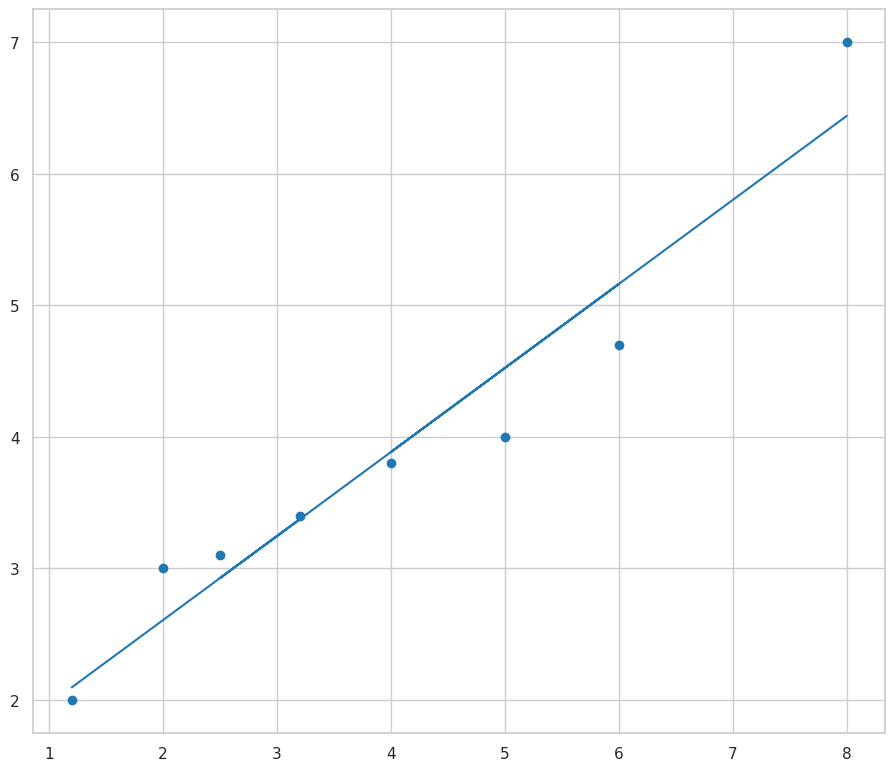

In [82]:
plt.plot(x,y_prima)
plt.scatter(x,y);

In [83]:
df_mse = pd.DataFrame.from_dict({
    "x"       :x,
    "y"       :y,
    "y_prima" :y_prima,
    "xy"      :xy,
    "x_2"     :x_2,
    "sum_x"   :sum_x,
    "sum_y"   :sum_y,
    "m"       :m,
    "b"       :b,
    "mse"     :mse
},)
df_mse

x    y   y_prima      xy     x_2  sum_x  sum_y         m         b  \
0  1.2  2.0  2.094815  146.43  162.93   31.9   31.0  0.638631  1.328457   
1  2.0  3.0  2.605720  146.43  162.93   31.9   31.0  0.638631  1.328457   
2  3.2  3.4  3.372078  146.43  162.93   31.9   31.0  0.638631  1.328457   
3  2.5  3.1  2.925036  146.43  162.93   31.9   31.0  0.638631  1.328457   
4  5.0  4.0  4.521614  146.43  162.93   31.9   31.0  0.638631  1.328457   
5  6.0  4.7  5.160246  146.43  162.93   31.9   31.0  0.638631  1.328457   
6  4.0  3.8  3.882983  146.43  162.93   31.9   31.0  0.638631  1.328457   
7  8.0  7.0  6.437508  146.43  162.93   31.9   31.0  0.638631  1.328457   

        mse  
0  0.125379  
1  0.125379  
2  0.125379  
3  0.125379  
4  0.125379  
5  0.125379  
6  0.125379  
7  0.125379

### Evaluando el modelo: R^2 y MSE
El prop√≥sito de evaluar un modelo de regresi√≥n e**s determinar qu√© tan bien se ajusta el modelo a los datos de entrenamiento y c√≥mo de bien generaliza a nuevos datos.** Esto es importante porque **un modelo que se ajusta muy bien a los datos de entrenamiento puede tener un sobreajuste (overfitting)**. Por otro lado, **un modelo que no se ajusta bien a los datos de entrenamiento puede subestimar la relaci√≥n entre las variables y no ser capaz de predecir de manera efectiva los valores de la variable objetivo.**

El error cuadr√°tico medio (MSE) y el coeficiente de determinaci√≥n (R-cuadrado R^2)  son dos m√©tricas comunes que se usan para evaluar el rendimiento de un modelo de regresi√≥n.

### El error cuadr√°tico medio (MSE)

El error cuadr√°tico medio (MSE) es otra m√©trica utilizada para evaluar modelos de regresi√≥n. El MSE mide el promedio de los cuadrados de los errores de predicci√≥n entre el modelo y los valores reales en el conjunto de datos. En otras palabras, el MSE calcula la diferencia cuadr√°tica promedio entre los valores predichos por el modelo y los valores reales observados. **Cuanto menor sea el valor de MSE, mejor ser√° el ajuste del modelo a los datos.**

![ok](https://gbhat.com/assets/gifs/linear_regression.gif)

**El coeficiente de determinaci√≥n (ùëÖ^2)**

El coeficiente de determinaci√≥n, denotado por R-cuadrado o R^2, es una m√©trica **que indica qu√© porcentaje de la variabilidad en la variable dependiente puede ser explicada por la variable independiente en un modelo de regresi√≥n lineal.** Es decir, R-cuadrado mide la calidad del ajuste del modelo a los datos. **El valor de R-cuadrado var√≠a entre 0 y 1**, donde **0 indica que el modelo no explica ninguna de la variabilidad** en la variable dependiente y **1 indica que el modelo explica toda la variabilidad**. Por lo tanto, **cuanto mayor sea el valor de R-cuadrado, mejor ser√° el ajuste del modelo a los datos.**


![ok](https://bookdown.org/pkaldunn/Book/34-Correlation_files/figure-html/R2Plots-.gif)

### Otras metricas importantes a conciderar
* **R ajustada (R¬≤ ajustada):** La R ajustada es una medida de la cantidad de variaci√≥n en la variable dependiente que es explicada por la variable independiente(s) en el modelo. A diferencia de la R¬≤, la R ajustada penaliza por la inclusi√≥n de variables irrelevantes o redundantes en el modelo.

* **Error m√°ximo:** Esta m√©trica mide el mayor error absoluto en las predicciones del modelo. Es √∫til para identificar observaciones que est√°n lejos de la l√≠nea de regresi√≥n y que pueden estar afectando la calidad del modelo.

* **Error absoluto promedio (MAE):** El MAE mide el promedio de los errores absolutos en las predicciones del modelo. Es √∫til para tener una idea de la magnitud promedio de los errores de predicci√≥n.

* **Mediana del los errores absolutos:** La mediana del error absoluto es una medida de la centralidad que indica el valor de la predicci√≥n que tiene la mitad de los errores por debajo y la otra mitad por encima. Es √∫til cuando los datos est√°n sesgados y la media no es una medida representativa de los errores.

* **Ra√≠z del promedio de los errores cuadrados (RMSE):** El RMSE mide el error promedio de las predicciones del modelo en unidades de la variable dependiente. Es una medida com√∫n para evaluar la precisi√≥n de los modelos de regresi√≥n.

* **Varianza explicada:** La varianza explicada mide la proporci√≥n de la varianza total en la variable dependiente que es explicada por la variable independiente(s) en el modelo. Es √∫til para evaluar la calidad del ajuste del modelo y comparar modelos diferentes.

### La gr√°fica de residuales
La gr√°fica de residuales es una herramienta de diagn√≥stico que se utiliza para evaluar la calidad del ajuste de un modelo de regresi√≥n lineal. En esta gr√°fica, se grafican los residuos del modelo (la diferencia entre los valores observados y los valores predichos por el modelo) en el eje vertical y los valores predichos por el modelo en el eje horizontal.

Una buena gr√°fica de residuales deber√≠a mostrar una distribuci√≥n aleatoria de los residuos alrededor del valor cero en el eje vertical. Esto indicar√≠a que el modelo se ajusta bien a los datos y que los residuos no tienen patrones discernibles. Si hay patrones en la distribuci√≥n de los residuos, como una curva en forma de U o una relaci√≥n no lineal, esto sugiere que el modelo no se ajusta bien a los datos.

En resumen, la gr√°fica de residuales es una herramienta visual que nos ayuda a entender c√≥mo se distribuyen los residuos en relaci√≥n con los valores predichos por el modelo. Si los residuos tienen un patr√≥n discernible, es una se√±al de que el modelo puede no estar ajust√°ndose bien a los datos y puede ser necesario realizar ajustes en el modelo o en los datos de entrada.